# 아이리스 데이터 분석 - KNN 모델

아이리스 데이터셋을 사용하여 **K-최근접 이웃(K-Nearest Neighbors, KNN)** 알고리즘으로 품종을 분류하는 지도 학습 예제입니다.

## 1. 필요한 라이브러리 임포트

In [1]:
# 데이터 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'AppleGothic' if plt.rcParams['font.family'][0] == 'DejaVu Sans' else plt.rcParams['font.family']
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 임포트 완료!")

라이브러리 임포트 완료!


## 2. 데이터 로드 및 탐색

In [2]:
# 아이리스 데이터셋 로드
iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("데이터셋 정보:")
print(f"데이터 크기: {df.shape}")
print(f"\n특성(Features): {iris.feature_names}")
print(f"\n품종(Target): {iris.target_names}")
print("\n데이터 미리보기:")
df.head(10)

데이터셋 정보:
데이터 크기: (150, 6)

특성(Features): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

품종(Target): ['setosa' 'versicolor' 'virginica']

데이터 미리보기:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [3]:
# 기본 통계 정보
print("기술 통계:")
df.describe()

기술 통계:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


품종별 데이터 개수:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing f

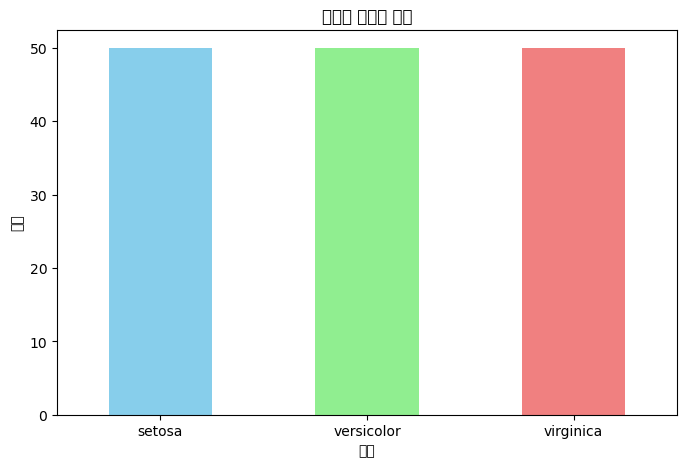

In [4]:
# 품종별 데이터 개수
print("품종별 데이터 개수:")
print(df['species_name'].value_counts())

# 시각화
plt.figure(figsize=(8, 5))
df['species_name'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('품종별 데이터 개수')
plt.xlabel('품종')
plt.ylabel('개수')
plt.xticks(rotation=0)
plt.show()

## 3. 데이터 시각화

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from fo

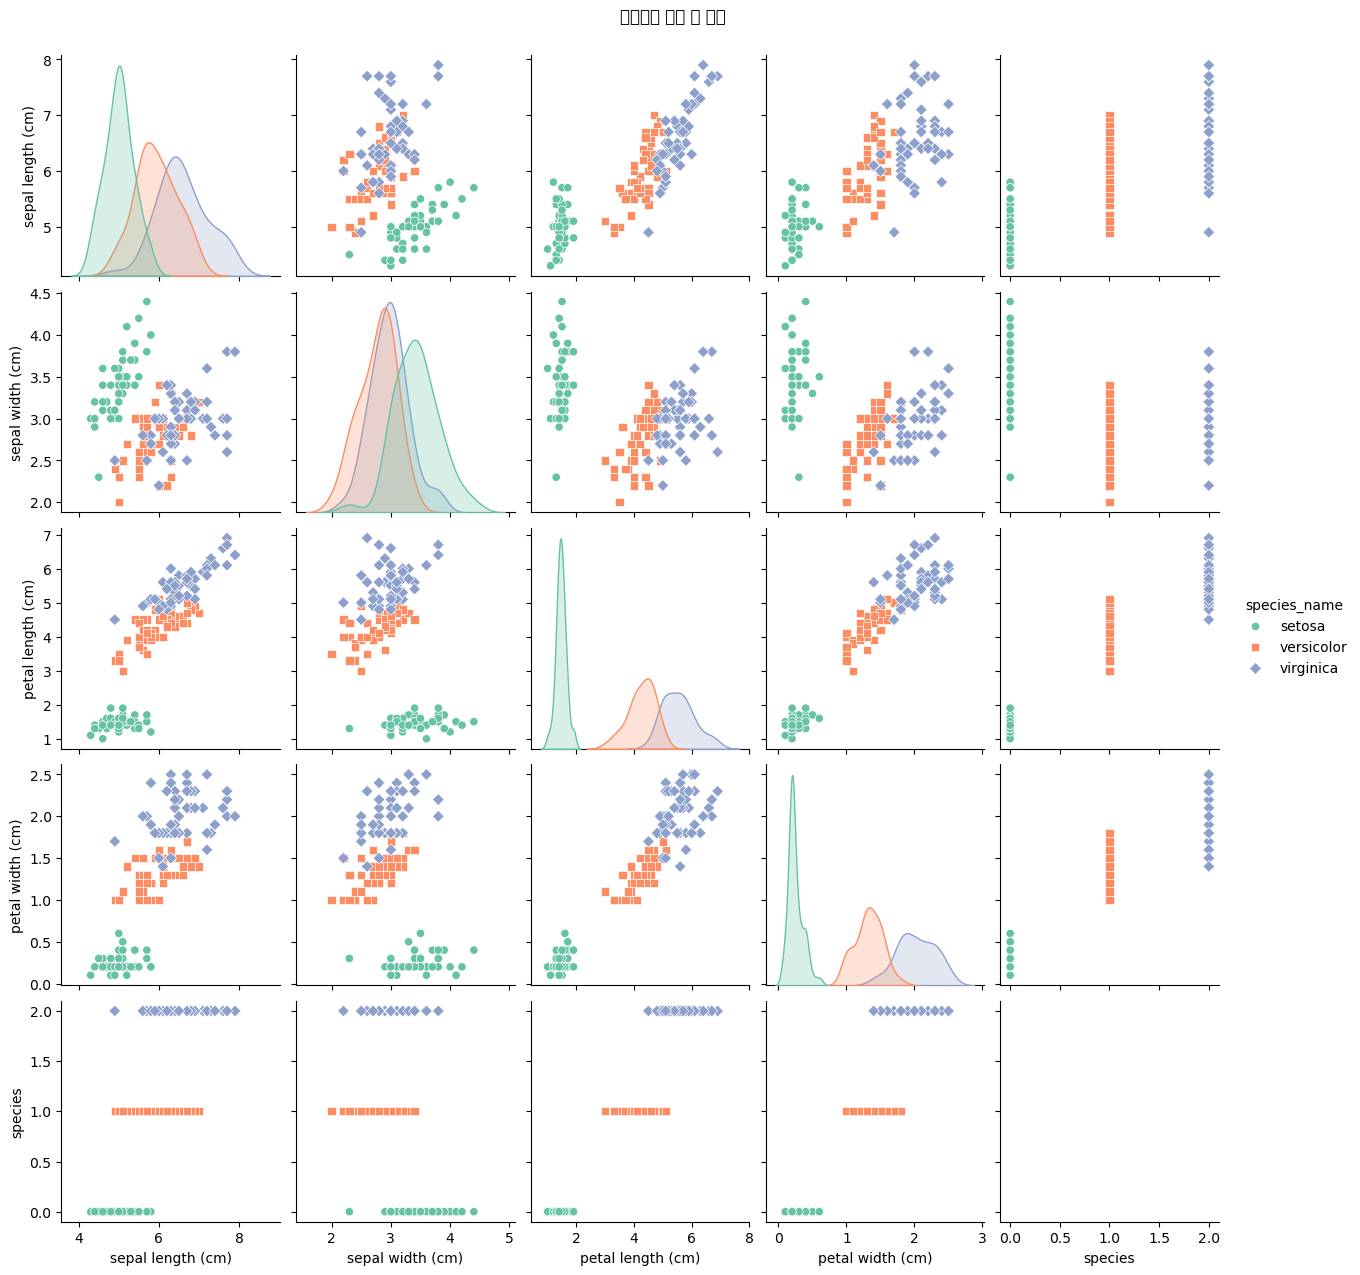

In [5]:
# 특성 간 관계 시각화 (Pairplot)
sns.pairplot(df, hue='species_name', markers=['o', 's', 'D'], palette='Set2')
plt.suptitle('아이리스 특성 간 관계', y=1.02)
plt.show()

/var/folders/w5/6vr5_hmd40qbmxy_72pgbdg40000gn/T/ipykernel_35538/3643139182.py:12: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/w5/6vr5_hmd40qbmxy_72pgbdg40000gn/T/ipykernel_35538/3643139182.py:12: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/w5/6vr5_hmd40qbmxy_72pgbdg40000gn/T/ipykernel_35538/3643139182.py:12: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt

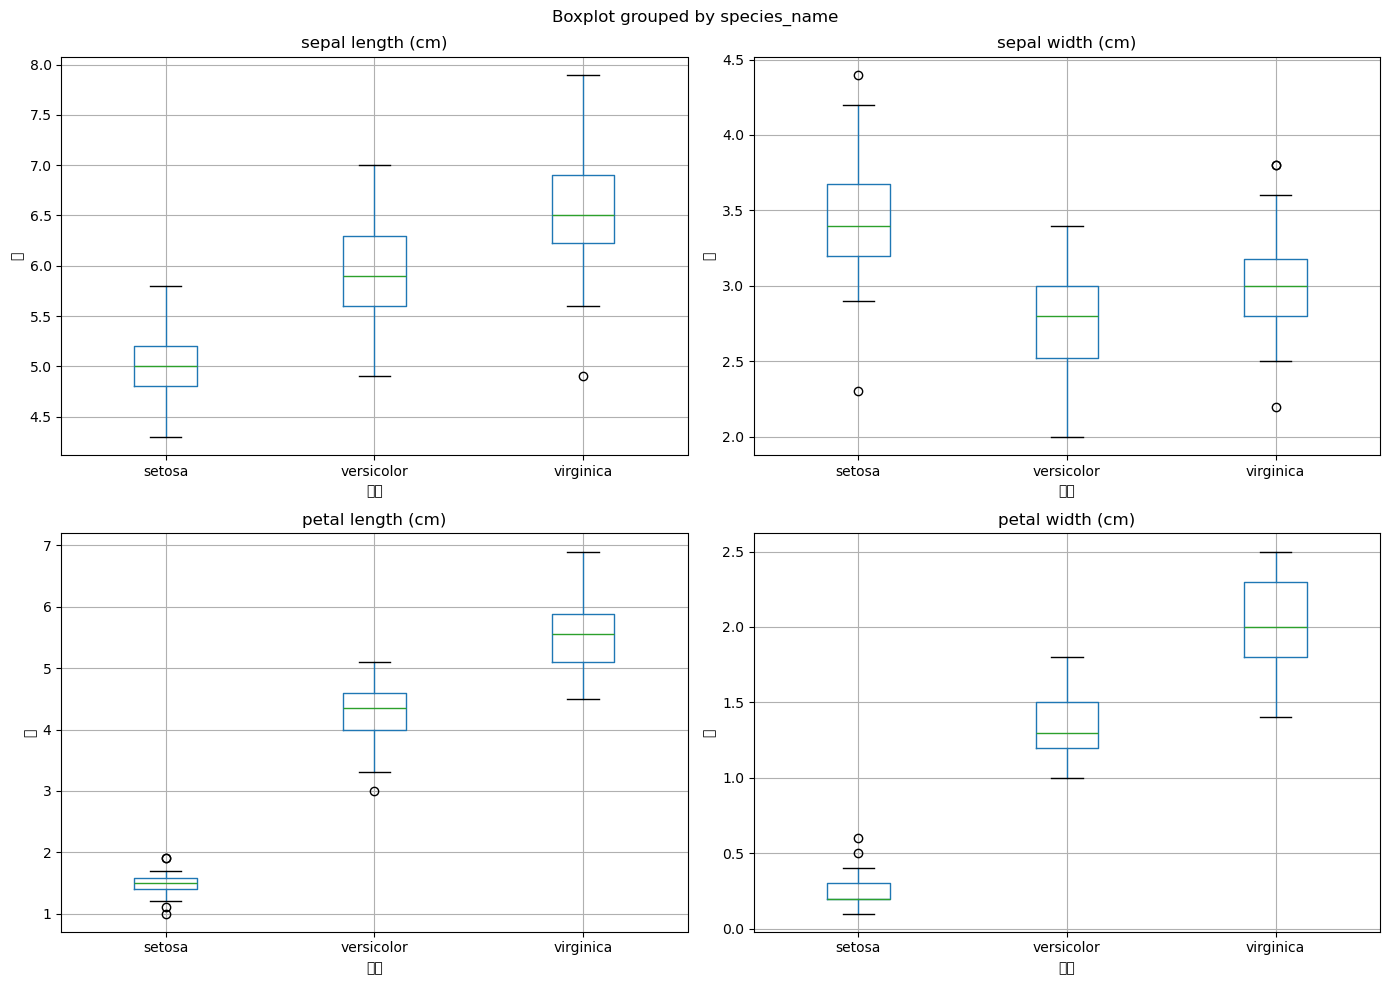

In [6]:
# 박스플롯으로 특성별 분포 확인
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('품종별 특성 분포', fontsize=16)

for idx, col in enumerate(iris.feature_names):
    ax = axes[idx // 2, idx % 2]
    df.boxplot(column=col, by='species_name', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('품종')
    ax.set_ylabel('값')

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missin

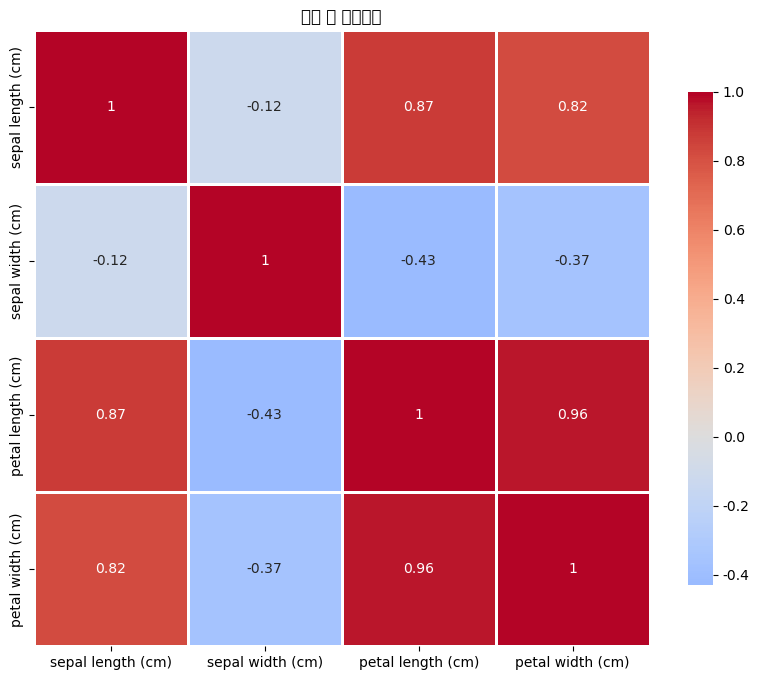


상관관계 행렬:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [7]:
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
correlation = df[iris.feature_names].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('특성 간 상관관계')
plt.show()

print("\n상관관계 행렬:")
print(correlation)

## 4. 데이터 전처리

In [8]:
# 특성(X)과 타겟(y) 분리
X = iris.data
y = iris.target

print(f"특성 데이터 크기: {X.shape}")
print(f"타겟 데이터 크기: {y.shape}")

특성 데이터 크기: (150, 4)
타겟 데이터 크기: (150,)


In [9]:
# 훈련 데이터와 테스트 데이터 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")
print(f"\n훈련 데이터 품종 분포:\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"\n테스트 데이터 품종 분포:\n{pd.Series(y_test).value_counts().sort_index()}")

훈련 데이터 크기: (120, 4)
테스트 데이터 크기: (30, 4)

훈련 데이터 품종 분포:
0    40
1    40
2    40
Name: count, dtype: int64

테스트 데이터 품종 분포:
0    10
1    10
2    10
Name: count, dtype: int64


In [10]:
# 특성 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("스케일링 전 훈련 데이터 통계:")
print(f"평균: {X_train.mean(axis=0)}")
print(f"표준편차: {X_train.std(axis=0)}")

print("\n스케일링 후 훈련 데이터 통계:")
print(f"평균: {X_train_scaled.mean(axis=0)}")
print(f"표준편차: {X_train_scaled.std(axis=0)}")

스케일링 전 훈련 데이터 통계:
평균: [5.84166667 3.04833333 3.77       1.205     ]
표준편차: [0.837415   0.44665112 1.761136   0.75947899]

스케일링 후 훈련 데이터 통계:
평균: [-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]
표준편차: [1. 1. 1. 1.]


## 5. KNN 모델 학습

In [11]:
# KNN 모델 생성 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn.fit(X_train_scaled, y_train)

print("KNN 모델 학습 완료!")
print(f"사용된 이웃의 수 (k): {knn.n_neighbors}")

KNN 모델 학습 완료!
사용된 이웃의 수 (k): 5


## 6. 모델 예측 및 평가

In [12]:
# 예측
y_pred = knn.predict(X_test_scaled)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.4f} ({accuracy*100:.2f}%)")

# 훈련 데이터 정확도
train_accuracy = knn.score(X_train_scaled, y_train)
print(f"훈련 데이터 정확도: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

테스트 데이터 정확도: 0.9333 (93.33%)
훈련 데이터 정확도: 0.9750 (97.50%)


In [13]:
# 분류 리포트
print("분류 리포트:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

분류 리포트:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing fr

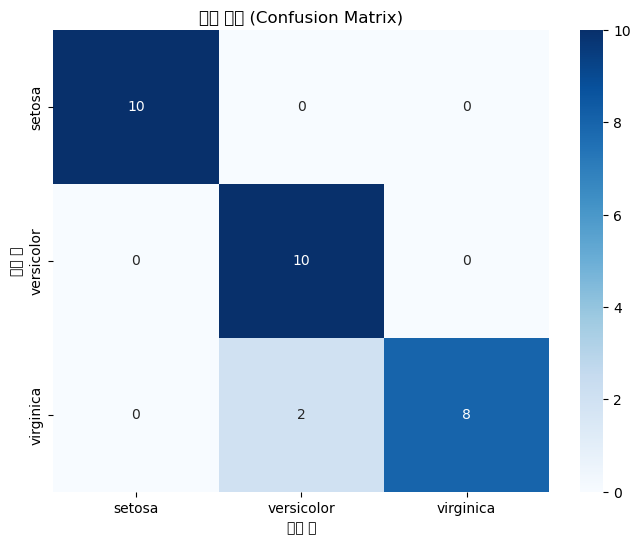


혼동 행렬:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


In [14]:
# 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('혼동 행렬 (Confusion Matrix)')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

print("\n혼동 행렬:")
print(cm)

## 7. 최적의 K 값 찾기

In [15]:
# 다양한 k 값에 대해 정확도 측정
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    
    train_scores.append(knn_temp.score(X_train_scaled, y_train))
    test_scores.append(knn_temp.score(X_test_scaled, y_test))

# 최적의 k 값 찾기
best_k = k_range[np.argmax(test_scores)]
best_accuracy = max(test_scores)

print(f"최적의 k 값: {best_k}")
print(f"최고 테스트 정확도: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

최적의 k 값: 1
최고 테스트 정확도: 0.9667 (96.67%)


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing fr

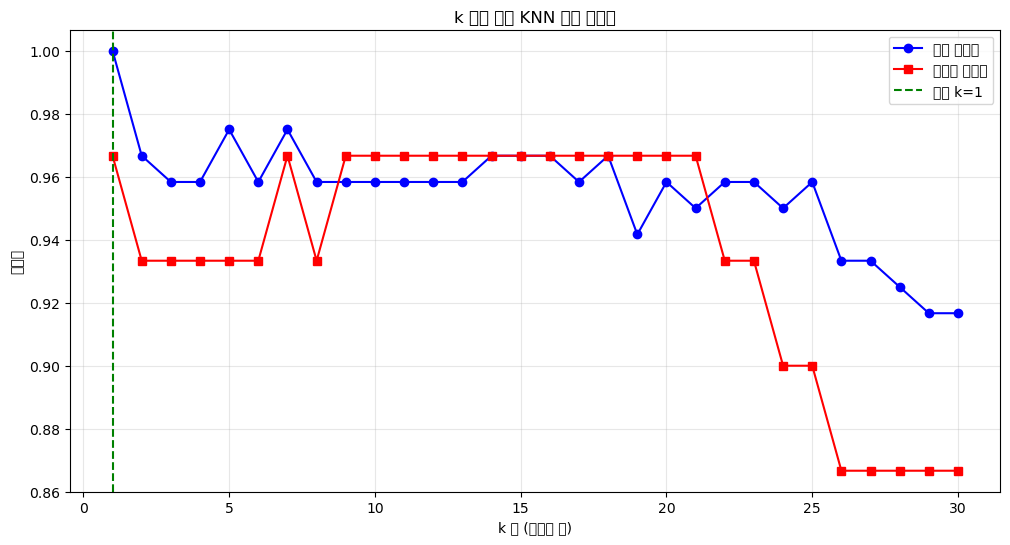

In [16]:
# k 값에 따른 정확도 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_scores, label='훈련 정확도', marker='o', color='blue')
plt.plot(k_range, test_scores, label='테스트 정확도', marker='s', color='red')
plt.axvline(x=best_k, color='green', linestyle='--', label=f'최적 k={best_k}')
plt.xlabel('k 값 (이웃의 수)')
plt.ylabel('정확도')
plt.title('k 값에 따른 KNN 모델 정확도')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 8. 최적 모델로 재학습

In [17]:
# 최적의 k 값으로 모델 재학습
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_best = knn_best.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"최적 모델 (k={best_k}) 테스트 정확도: {accuracy_best:.4f} ({accuracy_best*100:.2f}%)")
print("\n분류 리포트:")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))

최적 모델 (k=1) 테스트 정확도: 0.9667 (96.67%)

분류 리포트:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 9. 새로운 데이터 예측 예제

In [18]:
# 새로운 샘플 데이터 (sepal length, sepal width, petal length, petal width)
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # setosa 같은 특성
    [6.5, 3.0, 5.2, 2.0],  # virginica 같은 특성
    [5.9, 3.0, 4.2, 1.5]   # versicolor 같은 특성
])

# 스케일링
new_samples_scaled = scaler.transform(new_samples)

# 예측
predictions = knn_best.predict(new_samples_scaled)
probabilities = knn_best.predict_proba(new_samples_scaled)

print("새로운 데이터 예측 결과:\n")
for i, sample in enumerate(new_samples):
    pred_name = iris.target_names[predictions[i]]
    print(f"샘플 {i+1}: {sample}")
    print(f"  → 예측 품종: {pred_name}")
    print(f"  → 확률: setosa={probabilities[i][0]:.3f}, versicolor={probabilities[i][1]:.3f}, virginica={probabilities[i][2]:.3f}")
    print()

새로운 데이터 예측 결과:

샘플 1: [5.1 3.5 1.4 0.2]
  → 예측 품종: setosa
  → 확률: setosa=1.000, versicolor=0.000, virginica=0.000

샘플 2: [6.5 3.  5.2 2. ]
  → 예측 품종: virginica
  → 확률: setosa=0.000, versicolor=0.000, virginica=1.000

샘플 3: [5.9 3.  4.2 1.5]
  → 예측 품종: versicolor
  → 확률: setosa=0.000, versicolor=1.000, virginica=0.000



## 10. 결과 요약

In [19]:
print("=" * 60)
print("KNN 모델 학습 결과 요약")
print("=" * 60)
print(f"데이터셋 크기: {len(iris.data)}개")
print(f"특성(Features) 개수: {len(iris.feature_names)}개")
print(f"품종(Classes) 개수: {len(iris.target_names)}개")
print(f"\n훈련/테스트 분할: {len(X_train)}/{len(X_test)}")
print(f"\n최적의 k 값: {best_k}")
print(f"최종 테스트 정확도: {accuracy_best:.4f} ({accuracy_best*100:.2f}%)")
print("=" * 60)

# 테스트 데이터 예측 결과 DataFrame
results_df = pd.DataFrame({
    '실제값': [iris.target_names[i] for i in y_test],
    '예측값': [iris.target_names[i] for i in y_pred_best],
    '정답여부': ['O' if y_test[i] == y_pred_best[i] else 'X' for i in range(len(y_test))]
})

print("\n테스트 데이터 예측 결과 샘플 (처음 10개):")
print(results_df.head(10))

print(f"\n총 {len(y_test)}개 중 {sum(y_test == y_pred_best)}개 정답")

KNN 모델 학습 결과 요약
데이터셋 크기: 150개
특성(Features) 개수: 4개
품종(Classes) 개수: 3개

훈련/테스트 분할: 120/30

최적의 k 값: 1
최종 테스트 정확도: 0.9667 (96.67%)

테스트 데이터 예측 결과 샘플 (처음 10개):
          실제값         예측값 정답여부
0      setosa      setosa    O
1   virginica   virginica    O
2  versicolor  versicolor    O
3  versicolor  versicolor    O
4      setosa      setosa    O
5  versicolor  versicolor    O
6      setosa      setosa    O
7      setosa      setosa    O
8   virginica   virginica    O
9  versicolor  versicolor    O

총 30개 중 29개 정답


## 📚 학습 포인트

### KNN 알고리즘의 특징

1. **작동 원리**: 새로운 데이터가 주어지면 k개의 가장 가까운 이웃을 찾아 다수결로 분류
2. **거리 기반**: 유클리드 거리를 사용하여 가장 가까운 이웃을 찾음
3. **특성 스케일링 중요**: 거리 계산에 영향을 주므로 StandardScaler 사용

### 주요 하이퍼파라미터

- **n_neighbors (k)**: 이웃의 개수
  - k가 작으면: 복잡한 결정 경계, 과적합 위험
  - k가 크면: 단순한 결정 경계, 과소적합 위험
  
### 장단점

**장점**:
- 이해하기 쉬움
- 구현이 간단
- 학습 시간이 빠름 (lazy learning)

**단점**:
- 예측 시간이 느림 (모든 데이터와 거리 계산)
- 데이터가 많으면 메모리 사용량 증가
- 특성이 많으면 성능 저하 (차원의 저주)

### 다음 단계

- 다른 분류 알고리즘 시도 (SVM, Decision Tree, Random Forest 등)
- Cross-validation을 통한 더 정확한 모델 평가
- GridSearchCV로 하이퍼파라미터 최적화
- 실제 데이터에 적용